Потрібно створити кілька моделей класифікації (логістична регресія, svm, k-mean, NBC, 
Decision Tree and Random Forest) для порівняння результатів.
Для того, щоб можна було порівнювати ваші результати, зробіть крос-валідацію на 4 фолди.
Підберіть параметри так, щоб отримати найкращі результати.

Про набір даних.
Цей набір даних отримано від Національного інституту діабету, захворювань органів травлення та нирок. Мета полягає в тому, щоб передбачити на основі діагностичних вимірювань, чи є у пацієнта діабет.

Кількість спостережень: 768
Кількість атрибутів: 8 плюс клас
Для кожного атрибута: (усі мають числові значення)
1. Кількість разів вагітності
2. Концентрація глюкози в плазмі через 2 години в оральному тесті на толерантність до глюкози
3. Діастолічний артеріальний тиск (мм рт. ст.)
4. Товщина шкірної складки трицепса (мм)
5. 2-годинний сироватковий інсулін (мкОд/мл)
6. Індекс маси тіла (вага в кг/(зріст у м)^2)
7. Діабет племінна функція
8. Вік (років)
9. Змінна класу (0 або 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df=pd.read_csv('diabetes.csv')
X= df.drop('Outcome', axis=1)
y = np.asarray (df['Outcome'])
#y=df['Outcome']
#df

In [2]:
kf=KFold(
    n_splits=4,
    shuffle=True,
    random_state=42
)
# ініціалізуємо порожні списки, в яких зберігатимемо значення помилки на кожному фолді
train_res, test_res = [], []

# отримаємо індекси навчального та тестового набору
for train_idx, test_idx in kf.split(X, y):
    
    # виберемо поточну навчальну та тестову групи
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]
        
    # навчимо модель
    mdl = LinearRegression().fit(X_train, y_train)
    
    # виберемо прогнози
    y_train_preds, y_test_preds = mdl.predict(X_train), mdl.predict(X_test)
    
    # порахуємо помилки та збережемо у відповідні списки
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

print('Помилки на навчальних наборах: ', train_res)
print('Помилки на тестових наборах: ', test_res)

Помилки на навчальних наборах:  [0.15, 0.16, 0.16, 0.15]
Помилки на тестових наборах:  [0.18, 0.16, 0.16, 0.17]


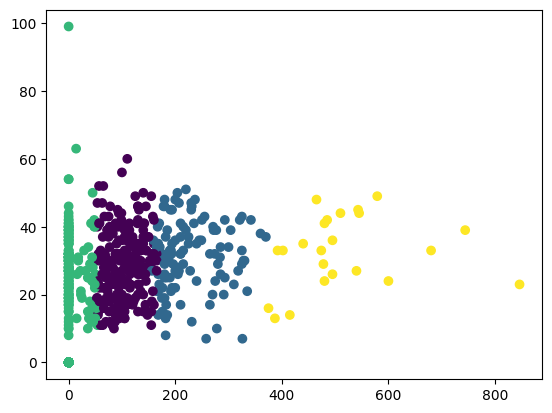

In [3]:
from sklearn.cluster import KMeans
x=np.asarray (X)
# ініціалізуємо модель кластеризації
km = KMeans(
    n_clusters=4,  # кількість кластерів
    n_init=10,  # кількість спроб ініціалізації
    random_state=42  # фіксація випадкового стану
)

# отримаємо значення кластерів
km = km.fit(x)
clusters = km.labels_
#plt.scatter(x[:, 0], x[:, 1], c=clusters)
plt.scatter(x[:, 4], x[:, 3], c=clusters)
plt.show()

C:\Users\vvelichko\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vvelichko\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vvelichko\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vvelichko\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

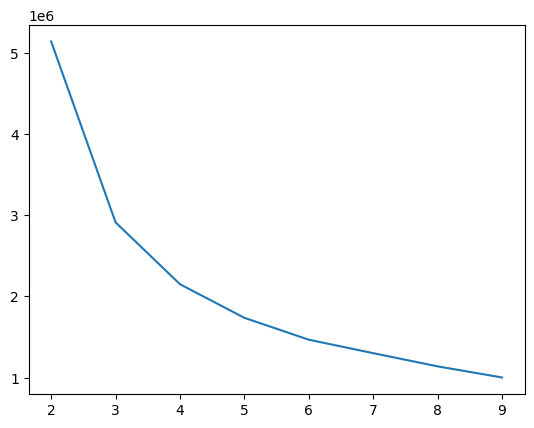

In [4]:
inertias = []
for num_clusters in range(2, 10):    
    km = KMeans(n_clusters=num_clusters).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(range(2, 10), inertias)
plt.show()

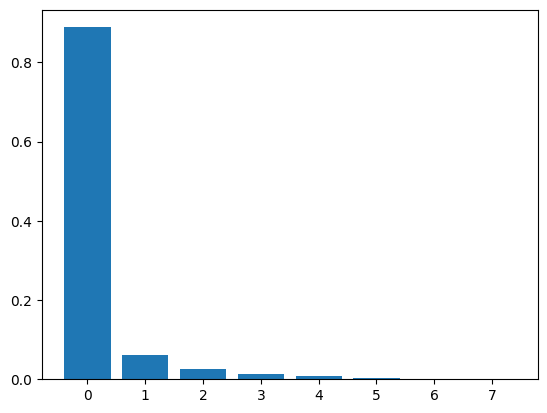

In [5]:
from sklearn.decomposition import PCA

# вивантажимо дані
# знайдемо головні компоненти
pca = PCA(
    n_components=8  # знайдемо всі 8 можливі компоненти, тому що у нас є 8 оригінальні змінні
).fit(X)

# побудуємо графік поясненої дисперсії кожною компонентою
plt.bar(range(8), pca.explained_variance_ratio_)
plt.show()

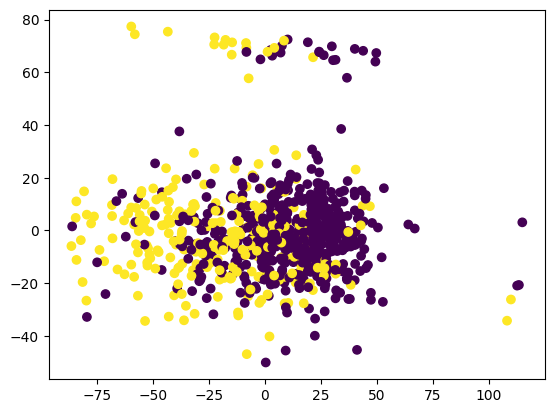

In [6]:
X_transform = pca.transform(X)  # перейдемо до нових осей

plt.scatter(X_transform[:, 1], X_transform[:, 2], c=y)
plt.show()

In [7]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
svm = SVC(
    C=1.,
    kernel='rbf',
    decision_function_shape='ovr'  # побудувати по моделлю на кожен клас, як "один проти всіх"
).fit(X_transform[:, :2], y)

y_preds = svm.predict(X_transform[:, :2])

f1_score(y, y_preds, average='macro')

0.7011546758025631

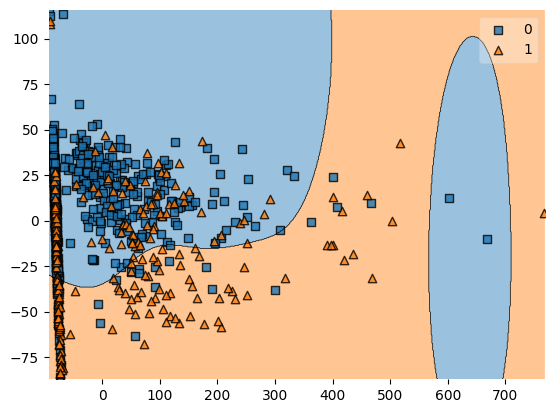

In [8]:
plot_decision_regions(X_transform[:, :2], y, clf=svm)
plt.show()

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree 
from matplotlib import pyplot as plt

tre = DecisionTreeRegressor(
    criterion='squared_error',  # критерій розбивки – зменшення середньоквадратичної помилки
    max_depth=2,  # максимальна кількість розбиттів (глибина дерева)
    min_samples_split=10,  # мінімальна кількість спостережень, щоб зробити розбиття
    min_samples_leaf=5  # мінімальна кількість спостережень, щоб сформувати лист дерева
).fit(X, y)

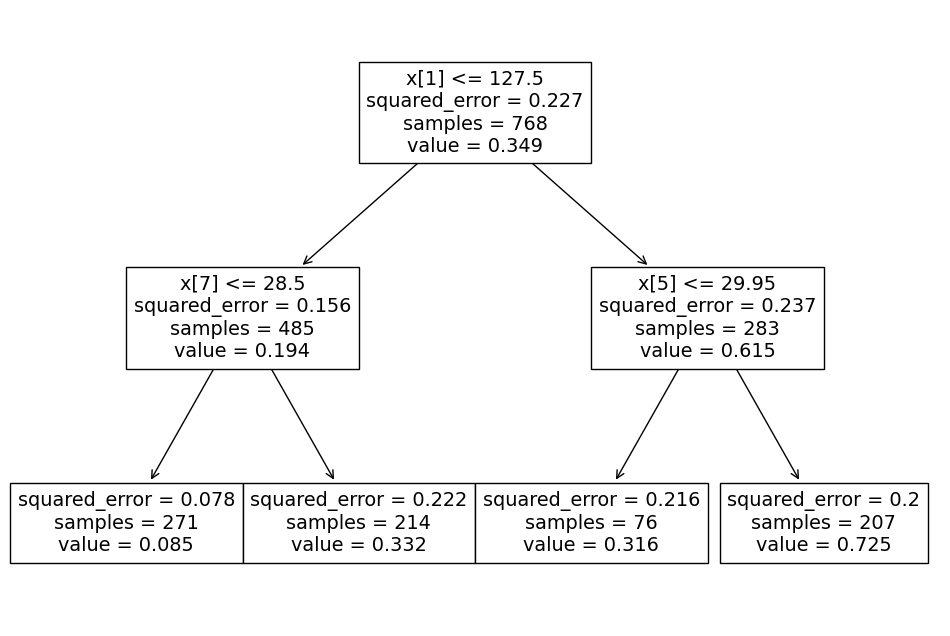

(768, 0.3489583333333333)

In [10]:


plt.figure(figsize=(12,8))
plot_tree(tre)
plt.show()
len(X), y.mean()

In [13]:
df=pd.read_csv('diabetes.csv')
X= df.drop('Outcome', axis=1)
y = np.asarray (df['Outcome'])
X
y.reshape((768))

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import roc_auc_score

tre = DecisionTreeClassifier(max_depth=5).fit(X, y)

predictions = tre.predict_proba(X)
auc = roc_auc_score(y, predictions)

print(auc)

plt.figure(figsize=(15,8))
plot_tree(tre)
plt.show()

ValueError: y should be a 1d array, got an array of shape (768, 2) instead.